In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"vpd.csv")

In [3]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [4]:
df.drop("NPD_WELL_BORE_CODE", inplace=True, axis=1)

In [5]:
def well_dataframe(well_name):
    """
    This Function receives the well name and filters the dataframe based on the name.
    """

    df_well = df[df["NPD_WELL_BORE_NAME"] == well_name]
    df_well = df_well.reset_index()
    
    if "index" in df_well.columns:
        df_well.drop("index", axis=1, inplace=True)
    else:
        df_well = df_well
        
    df_well["DATEPRD"] = pd.to_datetime(df_well["DATEPRD"])

    return df_well

In [6]:
df["NPD_WELL_BORE_NAME"].value_counts()

15/9-F-4       3327
15/9-F-5       3306
15/9-F-12      3056
15/9-F-14      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64

In [24]:
inj_sample = df[df["NPD_WELL_BORE_NAME"]=="15/9-F-4"]

In [27]:
inj_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3327 entries, 9001 to 12327
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3327 non-null   datetime64[ns]
 1   NPD_WELL_BORE_NAME        3327 non-null   object        
 2   ON_STREAM_HRS             3175 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     0 non-null      float64       
 4   AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64       
 5   AVG_DP_TUBING             0 non-null      float64       
 6   AVG_ANNULUS_PRESS         0 non-null      float64       
 7   AVG_CHOKE_SIZE_P          0 non-null      float64       
 8   AVG_CHOKE_UOM             0 non-null      object        
 9   AVG_WHP_P                 0 non-null      float64       
 10  AVG_WHT_P                 0 non-null      float64       
 11  DP_CHOKE_SIZE             3173 non-null   float64       
 12  BORE_OIL_VOL    

In [40]:
inj_sample.columns

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [42]:
inj_sample.reset_index(inplace=True)

,index,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,9001,2007-09-01,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
1,9002,2007-09-02,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2,9003,2007-09-03,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
3,9004,2007-09-04,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
4,9005,2007-09-05,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,12323,2016-10-05,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
3323,12324,2016-10-06,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
3324,12325,2016-10-07,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
3325,12326,2016-11-01,15/9-F-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI


In [25]:
inj_sample.iloc[:, 0] = pd.to_datetime(inj_sample["DATEPRD"])

C:\Users\oroji\AppData\Local\Temp\ipykernel_11912\3694558424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inj_sample.iloc[:, 0] = pd.to_datetime(inj_sample["DATEPRD"])
C:\Users\oroji\AppData\Local\Temp\ipykernel_11912\3694558424.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  inj_sample.iloc[:, 0] = pd.to_datetime(inj_sample["DATEPRD"])


<Axes: >

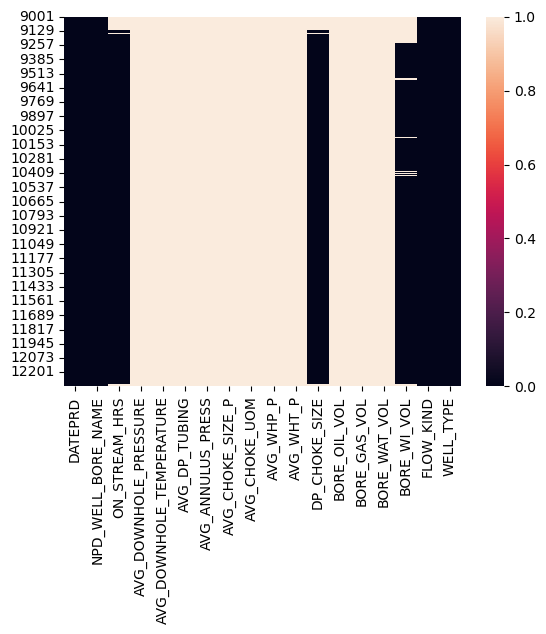

In [29]:
sns.heatmap(inj_sample.isna())

<Axes: >

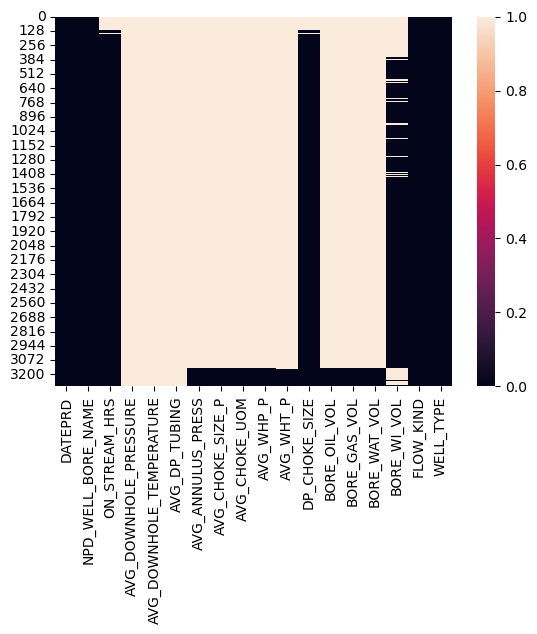

In [22]:
inj_2 = df[df["NPD_WELL_BORE_NAME"] == "15/9-F-5"].reset_index()
inj_2.drop("index", axis=1, inplace=True)
inj_2["DATEPRD"] = pd.to_datetime(inj_2["DATEPRD"])
sns.heatmap(inj_2.isna())


In [23]:
inj_2["WELL_TYPE"].value_counts()

WI    3162
OP     144
Name: WELL_TYPE, dtype: int64

In [24]:
inj_2["FLOW_KIND"].value_counts()

injection     3146
production     160
Name: FLOW_KIND, dtype: int64

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>], dtype=object)

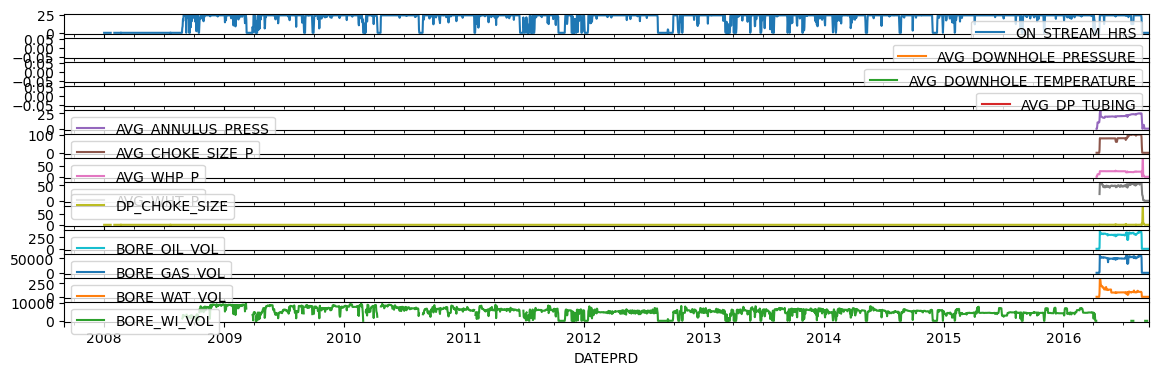

In [14]:
inj_2.set_index("DATEPRD").plot(subplots=True, figsize=(14, 4))

In [25]:
inj_2 = inj_2[inj_2["FLOW_KIND"] == "injection"]

In [26]:
inj_2["WELL_TYPE"].value_counts()

WI    3146
Name: WELL_TYPE, dtype: int64

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>], dtype=object)

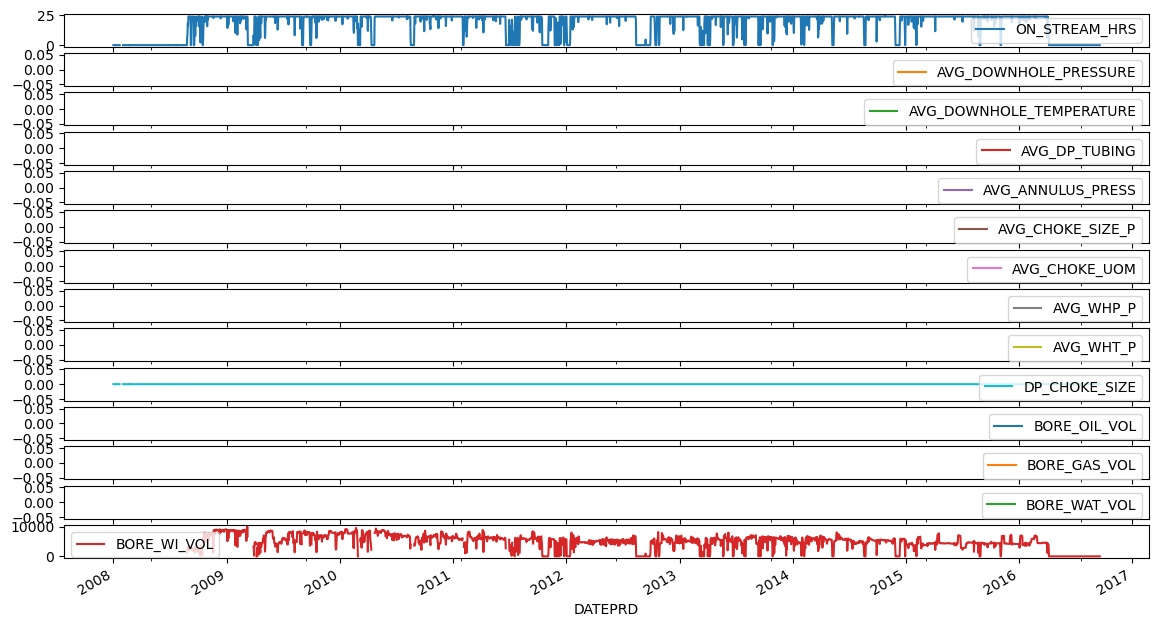

In [28]:
inj_2.set_index("DATEPRD").plot(subplots=True, figsize=(14, 8))

<Axes: >

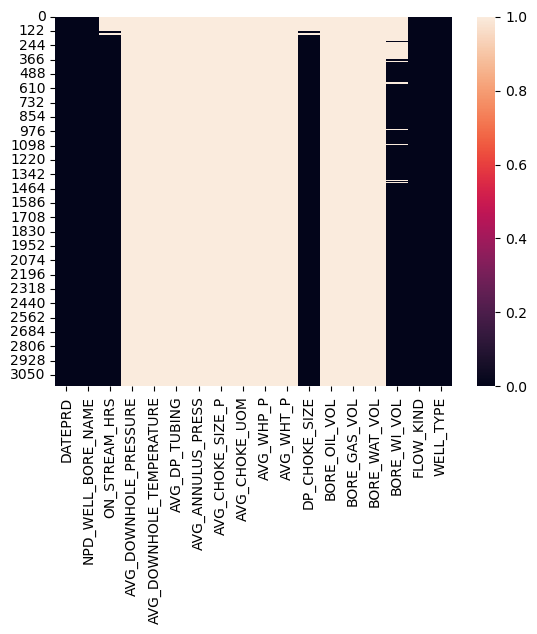

In [27]:
sns.heatmap(inj_2.isna())

<Axes: >

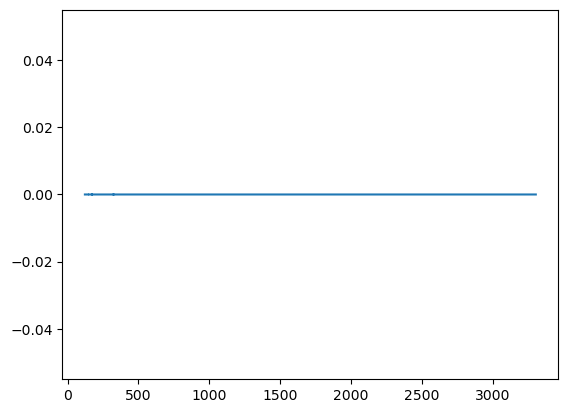

In [29]:
inj_2["DP_CHOKE_SIZE"].plot()

In [32]:
inj_2.drop(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',\
           'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',\
                'AVG_WHT_P', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'FLOW_KIND', 'WELL_TYPE',\
                    "DP_CHOKE_SIZE", "NPD_WELL_BORE_NAME"], axis=1, inplace=True)

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>], dtype=object)

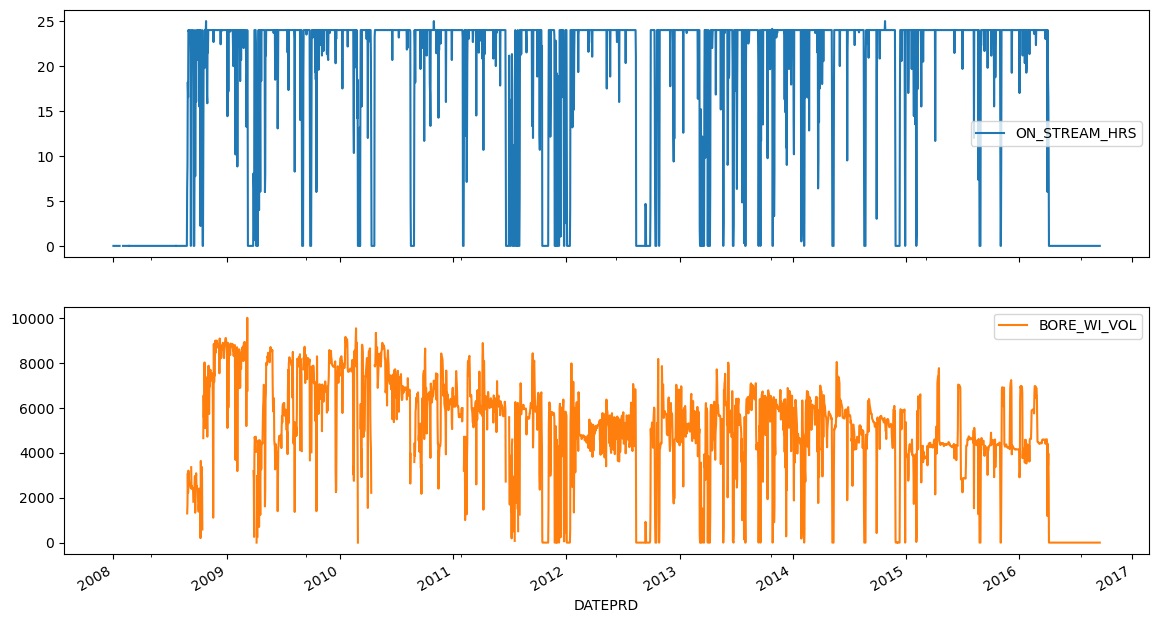

In [33]:
inj_2.set_index("DATEPRD").plot(subplots=True, figsize=(14, 8))

<Axes: >

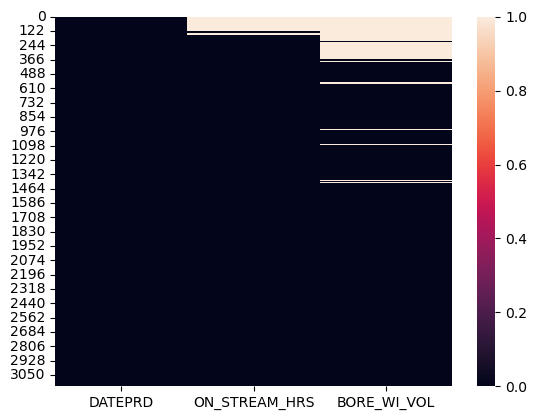

In [34]:
sns.heatmap(inj_2.isna())

<Axes: >

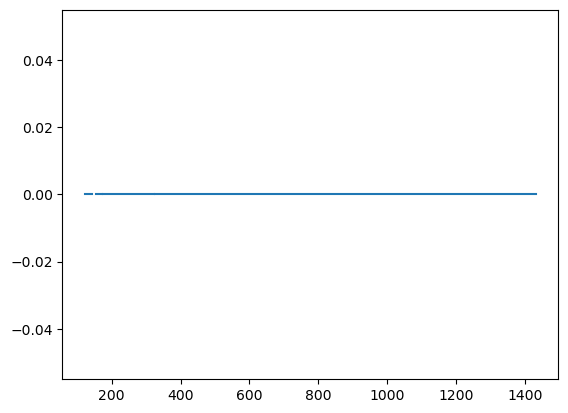

In [36]:
inj_2[inj_2["BORE_WI_VOL"].isna()]["ON_STREAM_HRS"].plot()
# Plot on_sTREAM_HRS where the WI is null. If HRS is zero then there is no Injection!

<Axes: >

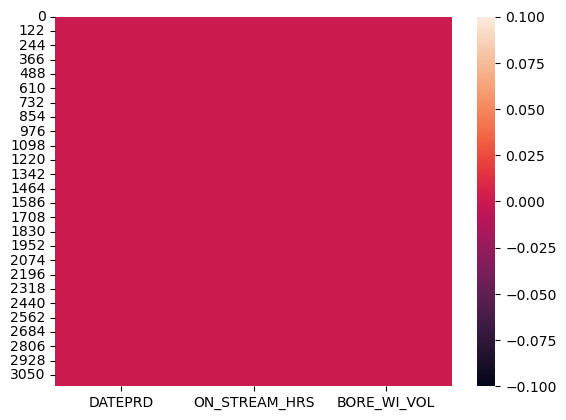

In [ ]:
inj_2.fillna(value=0, inplace=True)
sns.heatmap(inj_2.isna())

In [40]:
inj_1 = well_dataframe("15/9-F-4") # This well is injection well. Therefore only WI column and On Streaam Hours are good to use.
# (Line 15 - 33 Interactive code)
inj_1.drop(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',\
           'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',\
                'AVG_WHT_P', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'FLOW_KIND', 'WELL_TYPE',\
                    "DP_CHOKE_SIZE", "NPD_WELL_BORE_NAME"], axis=1, inplace=True)
inj_1.fillna(value=0, inplace=True)

In [52]:
df_inj = inj_1.merge(inj_2, on="DATEPRD", how="inner").reset_index()
df_inj

,index,DATEPRD,ON_STREAM_HRS_x,BORE_WI_VOL_x,ON_STREAM_HRS_y,BORE_WI_VOL_y
0,0,2007-09-01,0.0,0.0,0.0,0.0
1,1,2007-09-02,0.0,0.0,0.0,0.0
2,2,2007-09-03,0.0,0.0,0.0,0.0
3,3,2007-09-04,0.0,0.0,0.0,0.0
4,4,2007-09-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
3141,3141,2016-04-07,24.0,7938.0,0.0,0.0
3142,3142,2016-04-08,24.0,8077.0,0.0,0.0
3143,3143,2016-04-09,24.0,8043.0,0.0,0.0
3144,3144,2016-04-10,24.0,8059.0,0.0,0.0


<Axes: >

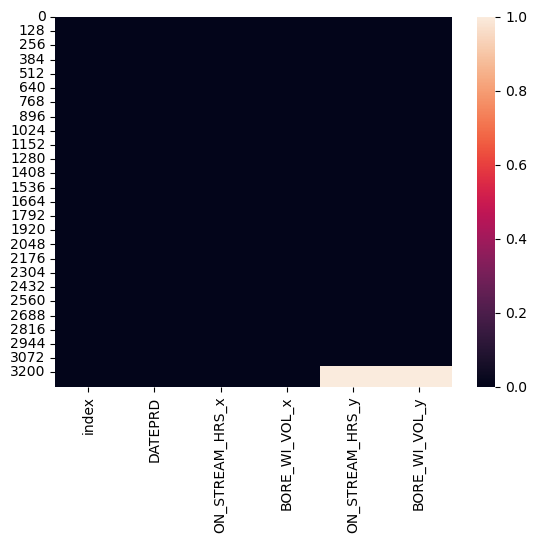

In [51]:
sns.heatmap(df_inj.isna())

In [44]:
inj_1["DATEPRD"].value_counts()

2007-09-01    1
2013-10-01    1
2013-09-21    1
2013-09-22    1
2013-09-23    1
             ..
2010-09-17    1
2010-09-18    1
2010-09-19    1
2010-09-20    1
2016-12-01    1
Name: DATEPRD, Length: 3327, dtype: int64

In [45]:
inj_2["DATEPRD"].value_counts()

2007-09-01    1
2013-05-21    1
2013-05-23    1
2013-05-24    1
2013-05-25    1
             ..
2010-07-18    1
2010-07-19    1
2010-07-20    1
2010-07-21    1
2016-09-18    1
Name: DATEPRD, Length: 3146, dtype: int64

Here I wan to see if the dates of two injection wells are overlapping

In [46]:
date_overlap = inj_1["DATEPRD"].isin(inj_2["DATEPRD"]) # This way you can check in if all the dates from inj_1 is included in inj2

In [47]:
date_overlap.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3327 entries, 0 to 3326
Series name: DATEPRD
Non-Null Count  Dtype
--------------  -----
3327 non-null   bool 
dtypes: bool(1)
memory usage: 3.4 KB


I want to see if the production time of inj_2 is included in the inj_1. Because I dont know if I should fill merge.outer with zero or I should drop the NA parts after merging. It seems that the production time of inj_2 is the same time of inj_1 and therefore cannot set to be zero.   This is a production time and must be deprectaed.

In [56]:
prod_2 = df[df["NPD_WELL_BORE_NAME"] == "15/9-F-5"].reset_index()


In [57]:
prod_2.drop("index", axis=1, inplace=True)

In [59]:
prod_2["DATEPRD"] = pd.to_datetime(prod_2["DATEPRD"])

In [61]:
prod_2["FLOW_KIND"].value_counts()

injection     3146
production     160
Name: FLOW_KIND, dtype: int64

In [62]:
prod_2 = prod_2[prod_2["FLOW_KIND"] == "production"]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

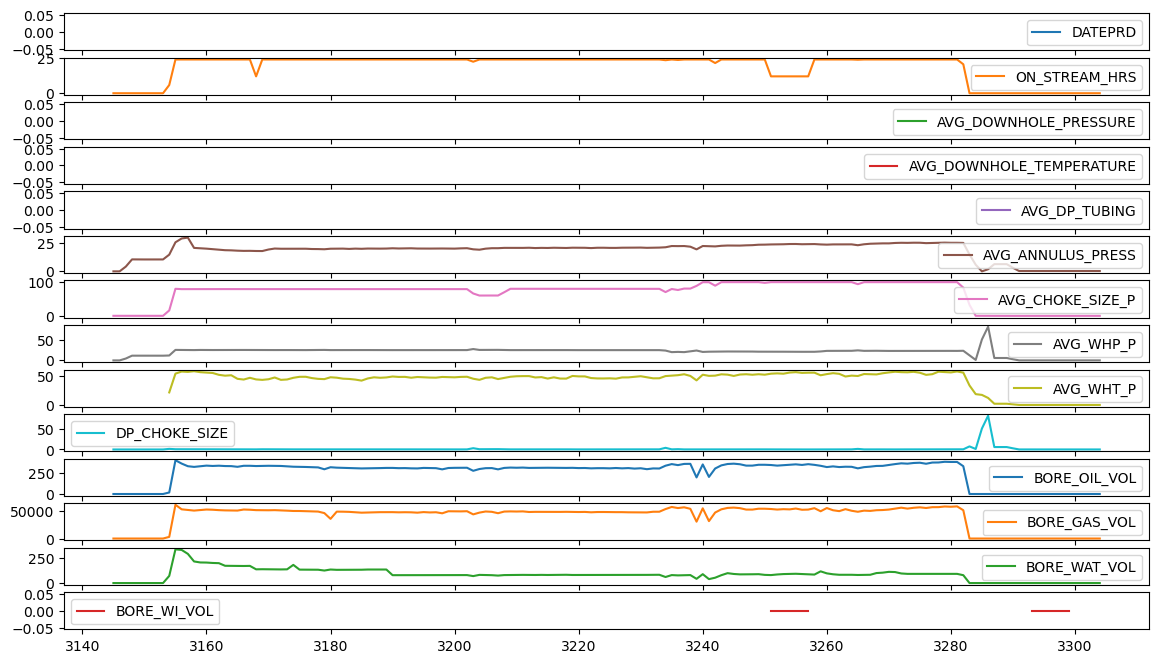

In [63]:
prod_2.plot(subplots=True, figsize=(14, 8))

In [65]:
prod_2.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,160.000000,0.0,0.0,0.0,160.000000,160.000000,160.000000,151.000000,160.000000,160.000000,160.000000,160.000000,15.0
mean,18.583312,NaN,NaN,NaN,17.959994,68.844518,21.323162,43.189106,1.309100,257.268750,41011.437500,84.600000,0.0
std,9.603513,NaN,NaN,NaN,7.571457,34.867560,10.113617,17.045282,7.804691,131.092781,20887.096124,59.446419,0.0
min,0.000000,NaN,NaN,NaN,0.000000,0.558970,0.000000,0.228000,0.000000,0.000000,0.000000,0.000000,0.0
25%,18.442500,NaN,NaN,NaN,18.951750,78.733778,21.569500,45.296000,0.139750,297.750000,47710.750000,77.000000,0.0
50%,24.000000,NaN,NaN,NaN,20.212500,79.519230,25.537500,48.360000,0.216000,308.000000,49502.500000,81.000000,0.0
75%,24.000000,NaN,NaN,NaN,22.532000,94.997033,25.693250,52.704500,0.321750,332.000000,53113.250000,98.250000,0.0
max,24.000000,NaN,NaN,NaN,29.454000,100.000000,83.865000,58.343000,83.865000,397.000000,62251.000000,334.000000,0.0


In [67]:
date_overlap2 = prod_2["DATEPRD"].isin(inj_1["DATEPRD"])
date_overlap2.shape

(160,)

Now let us move to production wells

In [3]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [4]:
df["NPD_WELL_BORE_NAME"].value_counts()

15/9-F-4       3327
15/9-F-5       3306
15/9-F-12      3056
15/9-F-14      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64

<Axes: >

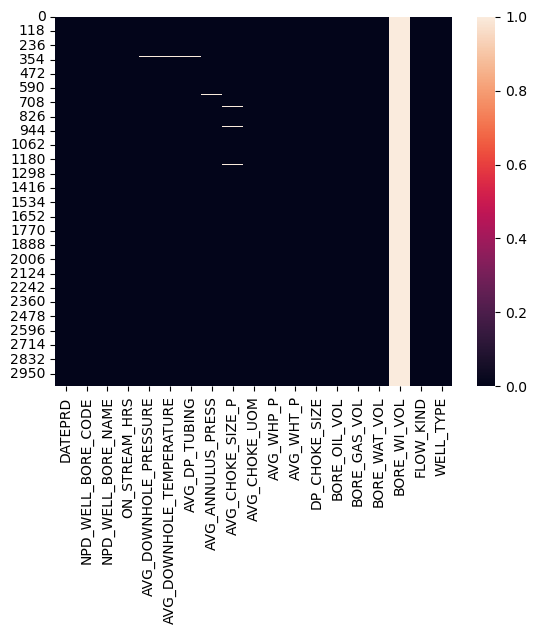

In [5]:
pro_1 = df[df["NPD_WELL_BORE_NAME"] == "15/9-F-12"].reset_index()
pro_1.drop("index", axis=1, inplace=True)
pro_1["DATEPRD"] = pd.to_datetime(pro_1["DATEPRD"])
sns.heatmap(pro_1.isna())

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

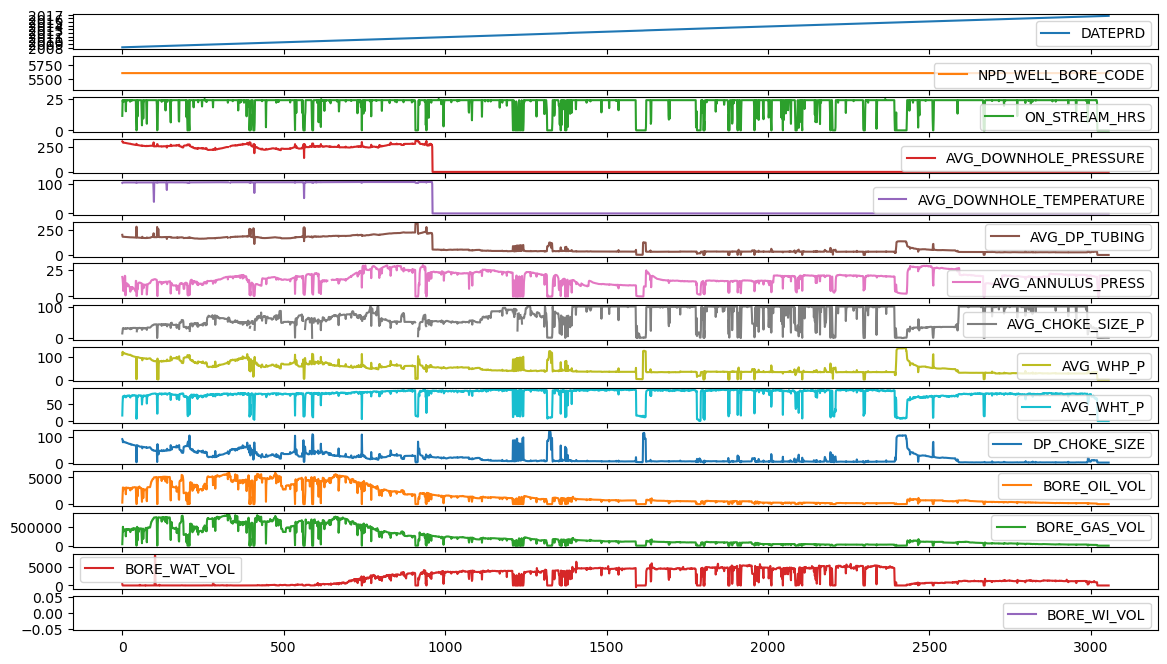

In [6]:
pro_1.plot(subplots=True, figsize=(14, 8))

In [7]:
pro_1.isna().sum()

DATEPRD                        0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS             13
AVG_CHOKE_SIZE_P              44
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 3056
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [29]:
pro_1.drop(["AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE"] , axis=1, inplace=True)
# Because the P  and T Sensors got broken ata time.

In [9]:
pro_1["AVG_DP_TUBING"].interpolate(method="linear", inplace=True)

In [10]:
pro_1["AVG_ANNULUS_PRESS"].interpolate(method="linear", inplace=True)
pro_1["AVG_CHOKE_SIZE_P"].interpolate(method="linear", inplace=True)

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>], dtype=object)

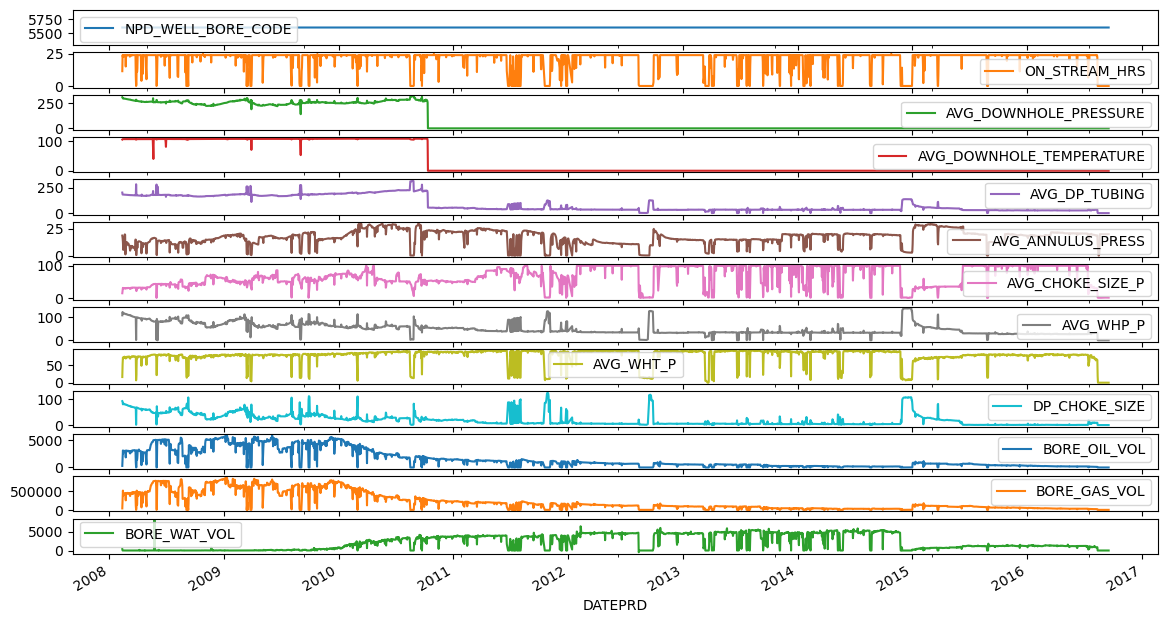

In [13]:
pro_1.set_index("DATEPRD").plot(subplots=True, figsize=(14, 8))

<Axes: >

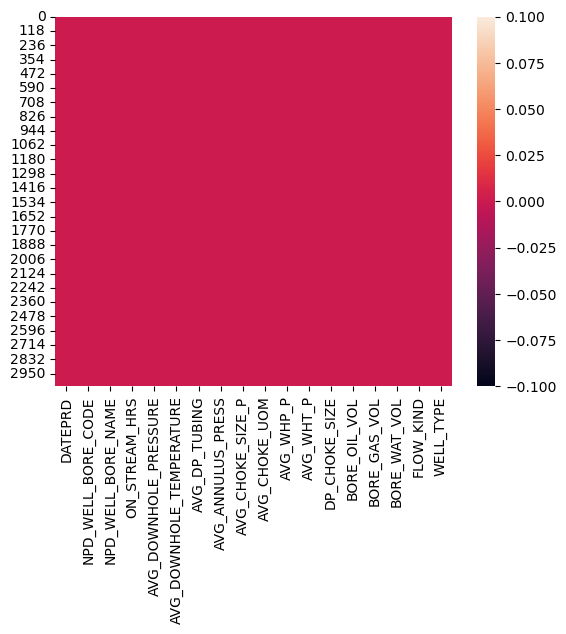

In [12]:
sns.heatmap(pro_1.isna())

In [14]:
pro_1.corr()

C:\Users\oroji\AppData\Local\Temp\ipykernel_6972\1639073953.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pro_1.corr()


,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
NPD_WELL_BORE_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ON_STREAM_HRS,NaN,1.000000,0.081565,0.097026,0.017441,0.566600,0.601551,-0.076573,0.840726,-0.284239,0.296982,0.306002,0.367924
AVG_DOWNHOLE_PRESSURE,NaN,0.081565,1.000000,0.995487,0.965131,-0.031712,-0.349942,0.624922,-0.037202,0.582758,0.821245,0.817704,-0.511741
AVG_DOWNHOLE_TEMPERATURE,NaN,0.097026,0.995487,1.000000,0.959198,-0.025766,-0.335273,0.615399,-0.025308,0.567495,0.851282,0.846266,-0.520784
AVG_DP_TUBING,NaN,0.017441,0.965131,0.959198,1.000000,-0.023122,-0.399440,0.693698,-0.093522,0.653901,0.780503,0.775907,-0.497549
AVG_ANNULUS_PRESS,NaN,0.566600,-0.031712,-0.025766,-0.023122,1.000000,0.227881,-0.178252,0.523711,-0.318308,0.074327,0.073452,0.217511
AVG_CHOKE_SIZE_P,NaN,0.601551,-0.349942,-0.335273,-0.399440,0.227881,1.000000,-0.516412,0.667079,-0.631652,-0.197097,-0.194376,0.644369
AVG_WHP_P,NaN,-0.076573,0.624922,0.615399,0.693698,-0.178252,-0.516412,1.000000,-0.195235,0.956562,0.535156,0.537976,-0.473715
AVG_WHT_P,NaN,0.840726,-0.037202,-0.025308,-0.093522,0.523711,0.667079,-0.195235,1.000000,-0.428885,0.148272,0.157678,0.566793
DP_CHOKE_SIZE,NaN,-0.284239,0.582758,0.567495,0.653901,-0.318308,-0.631652,0.956562,-0.428885,1.000000,0.437219,0.438599,-0.556576


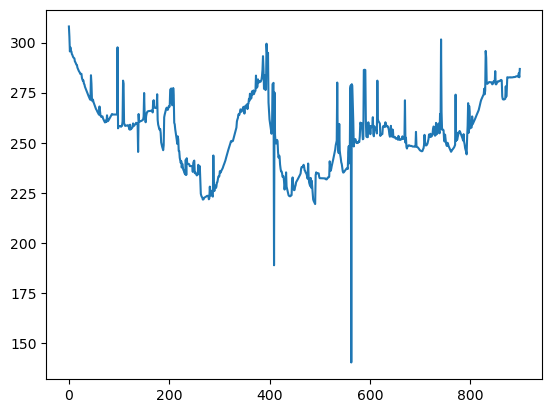

In [24]:
plt.plot(pro_1.index[0:900], pro_1["AVG_DOWNHOLE_PRESSURE"].iloc[0:900])

In [25]:
pro_1.iloc[0:900, :].corr()

C:\Users\oroji\AppData\Local\Temp\ipykernel_6972\4036401938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pro_1.iloc[0:900, :].corr()


,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
NPD_WELL_BORE_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ON_STREAM_HRS,NaN,1.000000,-0.208267,0.201593,-0.136066,0.438531,0.345320,-0.074223,0.797463,-0.278286,0.628466,0.627577,0.143799
AVG_DOWNHOLE_PRESSURE,NaN,-0.208267,1.000000,0.111821,0.527834,0.025675,-0.515041,0.481836,-0.149840,0.522411,-0.507952,-0.473668,0.267498
AVG_DOWNHOLE_TEMPERATURE,NaN,0.201593,0.111821,1.000000,0.164843,0.223384,0.187485,-0.055039,0.278619,-0.128753,0.087357,0.072791,0.152244
AVG_DP_TUBING,NaN,-0.136066,0.527834,0.164843,1.000000,0.485806,0.193294,-0.489198,0.060106,-0.398466,-0.336060,-0.337262,0.691747
AVG_ANNULUS_PRESS,NaN,0.438531,0.025675,0.223384,0.485806,1.000000,0.560487,-0.476401,0.682456,-0.597120,0.111727,0.091914,0.719195
AVG_CHOKE_SIZE_P,NaN,0.345320,-0.515041,0.187485,0.193294,0.560487,1.000000,-0.730091,0.483135,-0.817541,0.523991,0.479823,0.339612
AVG_WHP_P,NaN,-0.074223,0.481836,-0.055039,-0.489198,-0.476401,-0.730091,1.000000,-0.216181,0.948272,-0.178976,-0.142723,-0.438145
AVG_WHT_P,NaN,0.797463,-0.149840,0.278619,0.060106,0.682456,0.483135,-0.216181,1.000000,-0.453859,0.491524,0.485055,0.366731
DP_CHOKE_SIZE,NaN,-0.278286,0.522411,-0.128753,-0.398466,-0.597120,-0.817541,0.948272,-0.453859,1.000000,-0.309751,-0.272225,-0.474381


AS you can see from above there is no meaningful correlation between dp tubing and T and P of downhole.